# Analysis of Heavy Traffic Indicators on the I-94 Interstate Highway

In this project, we will be analysing a dataset about westbound traffic on the I-94 Interstate highway. 

This dataset is publically available and can be downloaded online from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

The goal of our analysis is to figure out the indicators of heavy traffic on the I-94. These indicators may include weather type, time of day, time of week etc. For example, one might find that traffic is typically heavier in the summer or when it snows.

## The I-94 Traffic Dataset

The first step is to read in the `Metro_Interstate_Traffic_Volume.csv` file using pandas. 

In [1]:
import pandas as pd
i94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

Let's examine the first and last five rows to get an idea of what our data looks like.

In [2]:
i94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
i94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


We'll also use the `DataFrame.info()` method to find out more about the dataset with regards to its schema.

In [4]:
i94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Analysing Traffic Volume

When we use the Matplotlib library inside Jupyter Notebook, we need to add the `%matplotlib inline` magic which enables Jupyter to generate the graphs. We only need to run this line once inside a notebook.

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

We will start off by analysing the westbound traffic volume on the I-94 between Saint Paul and Minneapolis, which is within the proximity of a station.

Let's plot a histogram to examine the distribution of the `traffic_volume` column.

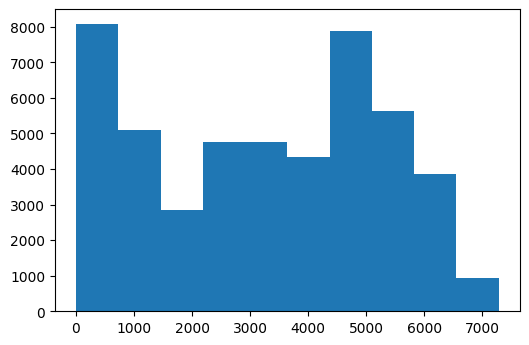

In [6]:
plt.hist(i94['traffic_volume'])
plt.show()

We'll also look up a few aggregation statistics about the `traffic_volume` column.

In [7]:
i94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

From our initial exploratory analysis of the traffic volume, we can interpret that about a quarter of the time, there were fewer than 1,200 cars passing the station within an hour. This most likely occurs during the night, or when roadworks are in operation along that stretch of road.

At the other end of the spectrum, the traffic volume was approximately 4x as much which likely occurs during peak hours within the daytime.

## Traffic Volume: Day vs. Night

The possibility that night time and day time might influence traffic volume provides us with an interesting direction for our analysis: comparing day time with night time data.

We'll start by dividing the dataset into two disparate ones based on time of day:
- Day time data: hours from 7am to 7pm (12 hours)
- Night time data: hours from 7pm to 7am (12 hours)

It is necessary to first transform the `date_time` column to a `datetime` object as it is currently formatted as a string object.

In [8]:
i94['date_time'] = pd.to_datetime(i94['date_time'])

Now, we'll extract the hour of each instance of the `date_time` column and isolate the data by day and night.

In [9]:
i94['hour'] = i94['date_time'].dt.hour
i94_day = i94[i94['hour'].between(7,18)]
i94_night = i94[~i94['hour'].between(7,18)]

We can now compare the traffic volume at night and during the day by plotting two respective histograms side-by-side on a grid chart.

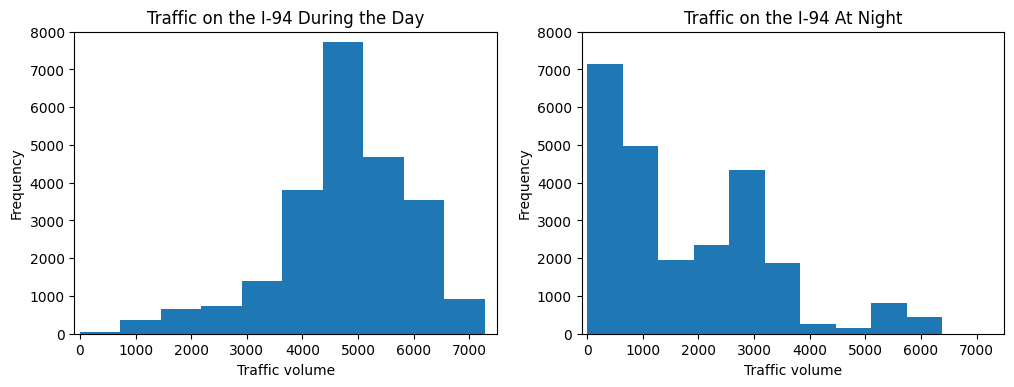

In [10]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.hist(i94_day['traffic_volume'])
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')
plt.title('Traffic on the I-94 During the Day')
plt.xlim([-100, 7500])
plt.ylim([0, 8000])

plt.subplot(1, 2, 2)
plt.hist(i94_night['traffic_volume'])
plt.xlabel('Traffic volume')
plt.ylabel('Frequency')
plt.title('Traffic on the I-94 At Night')
plt.xlim([-100, 7500])
plt.ylim([0, 8000])

plt.show()

Let's also look up a few statistics for `traffic_volume` for both day and night

In [11]:
i94_day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [12]:
i94_night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram for day time traffic shows a mostly symmetric distribution with a slight left-skew with a peak at around 5,000. Instances of extremely heavy and light traffic are both relatively infrequently, with rather few hours having traffic volumes below 3,000 and above 6,500 past the station.

The histogram for night time traffic is heavily right-skewed with the observations concentrated towards low volumes below 1,000, and very few instances of there being more than 3,000 cars travelling past the station within a given hour.

Given that the traffic is comparatively light at night and our goal is to find indicators of heavy traffic, it is fair to say that we should disregard night time data and instead, focus purely on day time data.

## Time Indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road during a certain month, certain day, or at a certain time within a particular day.

We will look at a couple of line plots illustrating how traffic volumes have changed according to the following parameters:
- Month
- Day of the week
- Time of day

### By Month

First, we will need aggregate the traffic volume averages by month to obtain a longer-term perspective of how time affects traffic.

In [13]:
i94_day['month'] = i94_day['date_time'].dt.month
i94_day_monthly = i94_day.groupby('month').mean()
i94_day_monthly['traffic_volume']

<ipython-input-13-d51fd8c8dd72>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

Now we'll generate a line plot to visualise how traffic volume has changed each month on average.

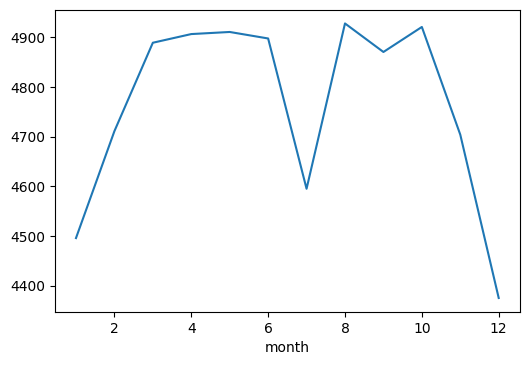

In [14]:
i94_day_monthly['traffic_volume'].plot.line()
plt.show()

From the line plot, we observe that traffic volume tends to be considerably lower during the winter months (i.e: December-February) perhaps due to the adverse weather conditions that make it more difficult and inconvenient to drive. Interestingly, there is also a dip in the average traffic volume during July. The reason for this exception is not immediately obvious and hence, we will investigate further to see whether there's a dip in July for every year.

<ipython-input-15-75df823df5d3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



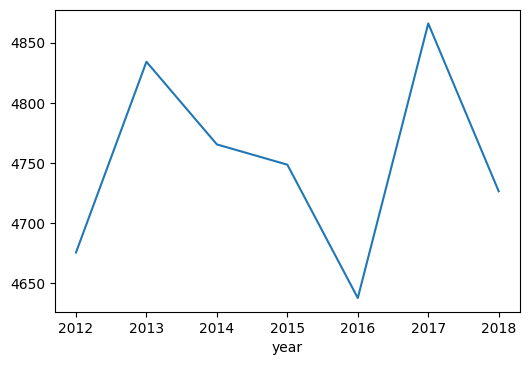

In [15]:
i94_day['year'] = i94_day['date_time'].dt.year
i94_day_july = i94_day[i94_day['month'] == 7]
i94_day_july_yearly = i94_day.groupby('year').mean()
i94_day_july_yearly['traffic_volume'].plot.line()
plt.show()

From the plot, we immediately see that the anomaly in the monthly average of July was a result of the lower than usually traffic in July 2016 specifically. It turns out that one year specifically dragged down the average for July overall, due to the construction works happening at the time along that stretch of road.

### By Day of the Week

We will now continue building line plots for another time unit: day of the week.

In [16]:
i94_day['dayofweek'] = i94_day['date_time'].dt.dayofweek
i94_dayofweek = i94_day.groupby('dayofweek').mean()
i94_dayofweek['traffic_volume']

<ipython-input-16-f0de1d9a9cfd>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

Let's generate a line plot to visualise how traffic volume changed each day of the week on average.

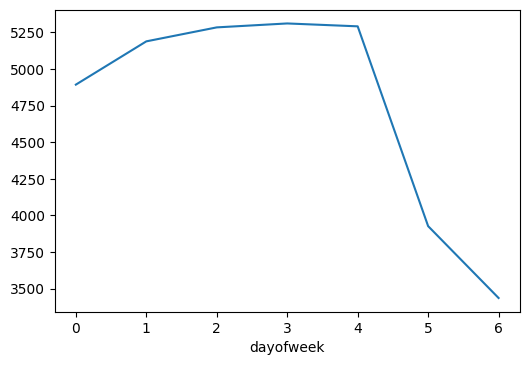

In [17]:
i94_dayofweek['traffic_volume'].plot.line()
plt.show()

There is a highly noticeable reduction in traffic volume on the weekends compared to weekdays. During business days, there are typically around 5,000 cars perusing this stretch of road. On the weekends, there is a suddenly drop to below 4,000 cars on average.

### By Time of Day

We'll now analyse traffic volume at a time of day granularity. The weekends, however, will noticeably drag down the average values and hence, we'll look at them separately by splitting the data based on the day type: business day vs. weekend.

In [18]:
i94_business_days = i94_day.copy()[i94_day['dayofweek'] <= 4]
i94_weekend = i94_day.copy()[i94_day['dayofweek'] >= 5]
i94_business_by_hour = i94_business_days.groupby('hour').mean()
i94_weekend_by_hour = i94_weekend.groupby('hour').mean()

print(i94_business_by_hour['traffic_volume'])
print(i94_weekend_by_hour['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


Now we'll create two line graphs on a grid chart to visualise how traffic volume changes by the time of the day.

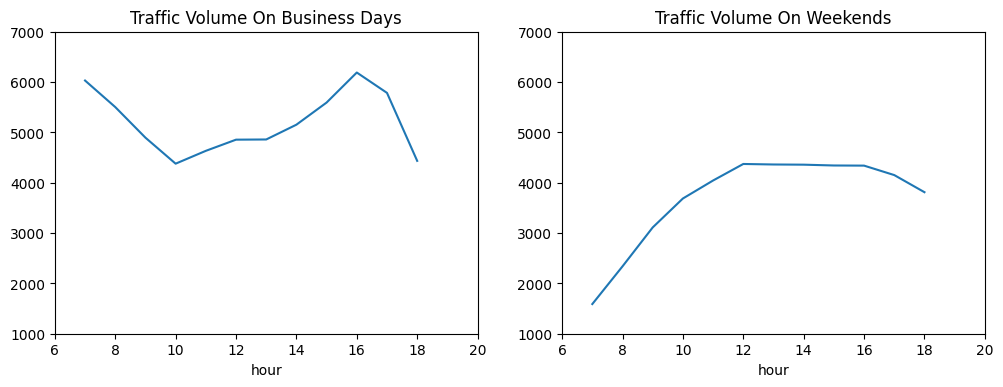

In [19]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
i94_business_by_hour['traffic_volume'].plot.line()
plt.title('Traffic Volume On Business Days')
plt.xlim([6, 20])
plt.ylim([1000, 7000])

plt.subplot(1, 2, 2)
i94_weekend_by_hour['traffic_volume'].plot.line()
plt.title('Traffic Volume On Weekends')
plt.xlim([6, 20])
plt.ylim([1000, 7000])

plt.show()

From observing both charts, we see that the amount of traffic on business days is consistently higher at virtually any hour during the day, on average. Judging by the peaks on the business days plot, the rush hours are around 7am in the morning and 4pm in the afternoon.

## Weather Indicators

Other than temporal factors, weather is also a potential indicator of traffic volume. The dataset provides us with several useful columns about weather, including `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main` and `weather_description`.

A few of these variables are numerical so let's begin by looking up their correlation values with `traffic_volume`.

In [20]:
i94_day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
hour              0.172704
month            -0.022337
year             -0.003557
dayofweek        -0.416453
Name: traffic_volume, dtype: float64

Amongst the weather related columns, `temp` appears to be the only one with any noticeable correlation with `traffic_volume` but even then, the correlation is quite weak with a value of around 0.13. Let's create a scatter plot between `temp` and `traffic_volume`.

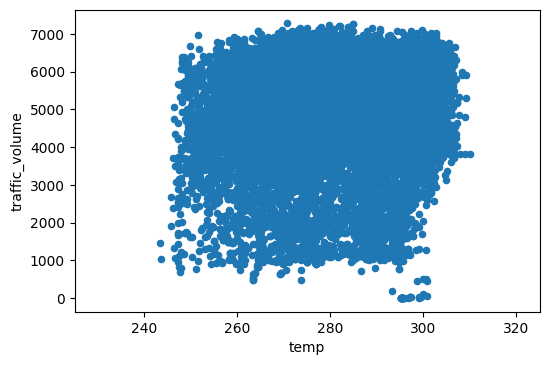

In [22]:
i94_day.plot.scatter(x='temp', y='traffic_volume')
plt.xlim([225, 325])
plt.show()

From examining the correlations and the above scatter plot, none of the numerical weather columns appear to be reliable indicators of heavy traffic.

## Weather Types

In an attmempt to find more useful data, we'll look next at the categorical weather-related columns: `weather_main` and `weather_description`.

We'll be calculating the average traffic volume associated with each unique value in these two columns, then creating a bar plot for the `traffic_volume` column grouped by `weather_main` and `weather_description`.

In [23]:
i94_by_weather_main = i94_day.groupby('weather_main').mean()
i94_by_weather_description = i94_day.groupby('weather_description').mean()

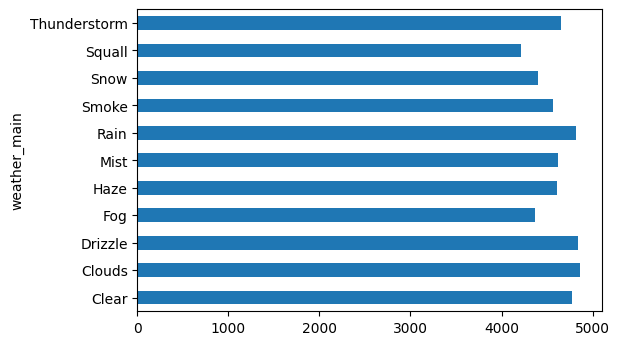

In [26]:
i94_by_weather_main['traffic_volume'].plot.barh()
plt.show()

There does not appear to be traffic volumes exceeding 5,000 cars on average for any of the weather categories listed under the `weather_main` column. This makes it rather difficult to find any type of weather as a reasonable indicator of heavy traffic.

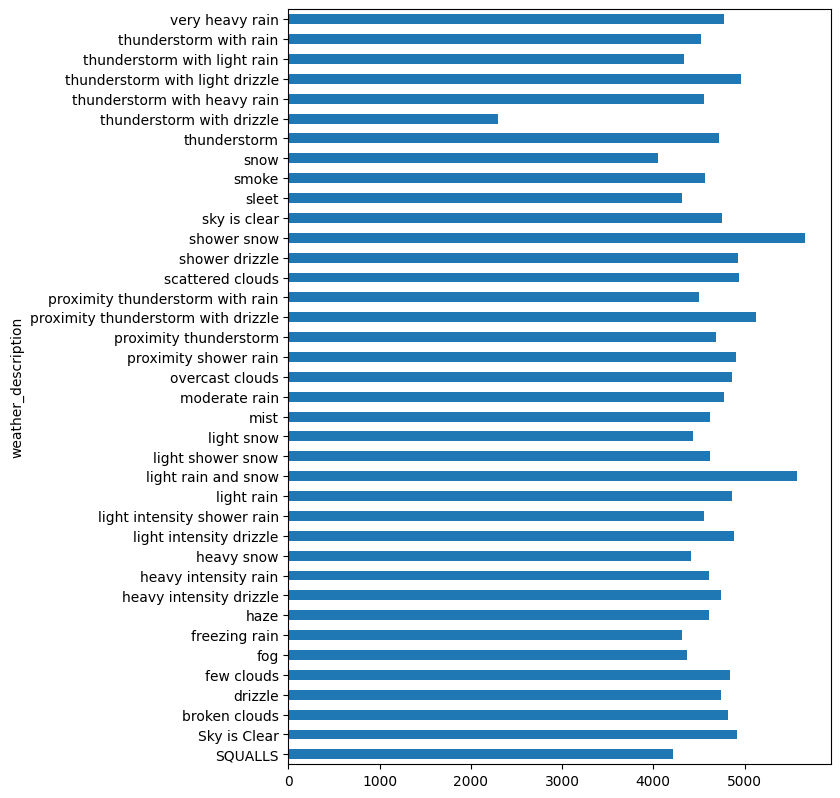

In [37]:
i94_by_weather_description['traffic_volume'].plot.barh(figsize=(7,10))
plt.show()

Upon creating a bar chart for `traffic_volume` by `weather_description`, we find two categories with an average traffic volume exceeding 5,000: **shower snow** and **light rain and snow** and **proximity thunderstorm with drizzle**. This suggests that the presence of other extreme weather factors in addition to rain impedes traffic thus resulting in congesting and therefore more cars along this route simultaneously.

## Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

- Time indicators
    - Traffic is normally heavier during warmer months (March to October) compared to colder ones (November to February).
    - Traffic is significantly heavier on weekdays compared to weekends.
    - Peak hours are usually around 7am and 4pm on weekdays.
- Weather indicators
    - Shower snow
    - Light rain and snow
    - Proximity thunderstorm with drizzle